<a href="https://colab.research.google.com/github/AnwarMirza/SEP740-Deep-Learning-McMaster-Summer2023/blob/main/07convNetTutorialPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset - [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist/)
Lets begin with loading MNIST handwritten digits dataset.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

This gives us the shape of the data:

In [ ]:
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


There are 60,000 training samples and 10,000 test samples. Each image is 28x28 = 784 pixels, while there are 8x8=64 pixels in the simplified digits dataset of scikit-learn.

This data has more resolution as compared to scikit-learn dataset, so we need more neurons to perform the classification.

The images can shown using the following function.

In [ ]:
def plot_img(i):
    # plot the image and the target for sample i
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

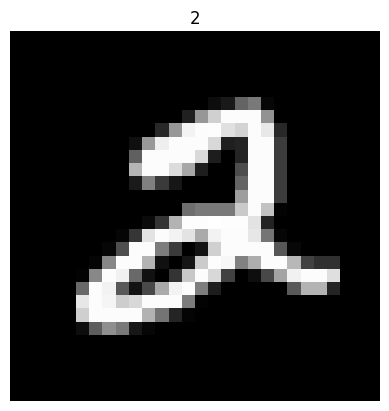

In [ ]:
plot_img(5)

The histogram for the pixel values of this image can be shown using $\texttt{hist}$ function of $\texttt{matplotlib}$.

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [25.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.],
        [23.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  3.],
        [22.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  4.],
        [21.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  3.],
        [19.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  3.],
        [18.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  1.,  4.],
        [17.,  1.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  5.],
        [17.,  1.,  2.,  0.,  0.,  1.,  0.,  1.,  1.,  5.],
        [17.,  1.,  0.,  0.,  2.,  0.,  1.,  1.,  1.,  5.],
        [17.,  1.,  0.,  0.,  2.,  1.,  1.,  1.,  1.,  4.],
        [17.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,  4.],
        [19.,  1.,  1.,  0.,  1.,  0.,  

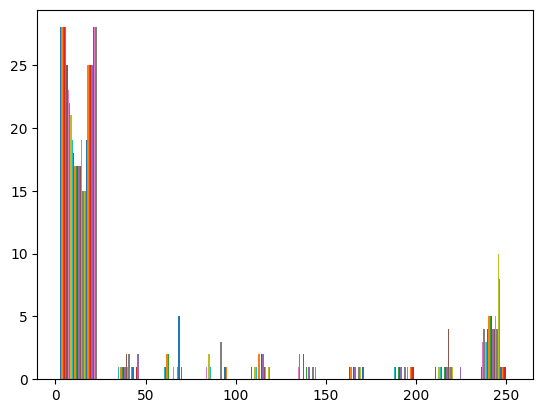

In [ ]:
plt.hist(x_train[5])

The pixel value range from 0 to 255 (using eight bit coding). We need to normalize these values. This can be easily done by diving the images (both training and testing) by 255.

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [25.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.],
        [23.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  3.],
        [22.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  4.],
        [21.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,  3.],
        [19.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  3.],
        [18.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  1.,  4.],
        [17.,  1.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  5.],
        [17.,  1.,  2.,  0.,  0.,  1.,  0.,  1.,  1.,  5.],
        [17.,  1.,  0.,  0.,  2.,  0.,  1.,  1.,  1.,  5.],
        [17.,  1.,  0.,  0.,  2.,  1.,  1.,  1.,  1.,  4.],
        [17.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  4.,  4.],
        [19.,  1.,  1.,  0.,  1.,  0.,  

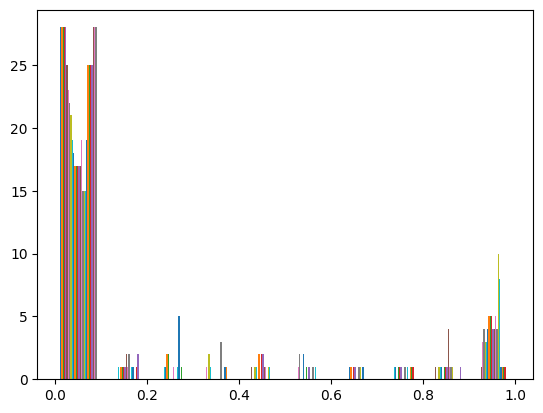

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
plt.hist(x_train[5])

The histogram is the same in shape, but the range of pixel values has been changed to: 0 to 1.

# Convolutional Neural Networks
We intend to design a convolutional neural network (CNN) for handwritten digit classification. There are ten digits, so out CNN will take ten output units. We are using CNN, as CNNs have been found to give excellent performance for image recognition problems.

A typical CNN for image classification problems has the following layers:

* **Convolution Layers** - These are used to generate interesting features from the images. The remaining layers use these features, instead of raw pixel (normalized) values. Normalized images are inputs to a convolution layer and we get the same number of values as the output (or slightly less), based on kernel size and the padding used in the convolution.
* **Pooling Layers** - Once we get interesting features from the convolution layer, the size of data can be reduced using a pooling layer. A kernel is moved across the features (just the way a kernel is moved across the images in convolution) and extract mean or max values (other values are also possible).
* **Fully Connected / Dense Layers** - A dense layer has all its neurons connected with all the neurons in the previous layer. It uses an optimization algorithm to perform the classification. The data must be **flatten** before passing on to this layer.
* **Dropout Layer** - These layers are placed before dense layers to **regularize** the network for generalization purposes.

# Convolutional Layers

In [ ]:
def convolve2D(image, kernel):
  # convolve2D: a function to perform 2D convolution

  # flip the kernel to prepare it for convolution
  kernel = np.flipud(np.fliplr(kernel))
  # create an output image of same shape and type as that of the input image
  output = np.zeros_like(image)
  # add zero-padding to the given image and save it into a new 'paddedImage'

  # Add zero padding to the input image
  paddedImage  = np.zeros( (image.shape[0]+(kernel.shape[0]-1),
                          image.shape[1]+(kernel.shape[1]-1)))
  paddedImage [(kernel.shape[0]//2):-(kernel.shape[0]//2),
               (kernel.shape[1]//2):-(kernel.shape[1]//2)] = image
  # perform the convolution
  for x in range(image.shape[1]):
    for y in range(image.shape[0]):
      output[y,x] = (kernel*paddedImage[y:y+kernel.shape[0],
                                        x:x+kernel.shape[1]]).sum()
  return (output)

In [ ]:
import math
from skimage import io, viewer
from scipy import fftpack

from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(512, 512)


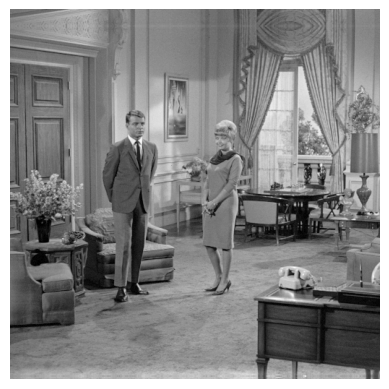

In [ ]:
image1 = io.imread("/content/gdrive/My Drive/Colab Notebooks/convolutionNetworks/images/livingroom.tif")
# image = tf.io.decode_(img1, channels=1)
print(image1.shape)

plt.axis('off')
plt.imshow(image1, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
from matplotlib.rcsetup import reduce


# kernel = np.array([[1, 2, 3], [4,5,6],[7,8,9]])
# print(kernel)

# kernel = np.flipud(kernel)
# print(kernel)

# kernel = np.fliplr(kernel)
# print(kernel)

# Averaging (Mean) Filter

kernel = np.ones([25, 25])
# print(kernel)
fac = reduce(lambda x, y: x*y, np.shape(kernel))
# print(fac)
kernel = kernel / fac
# print(kernel)

(512, 512)


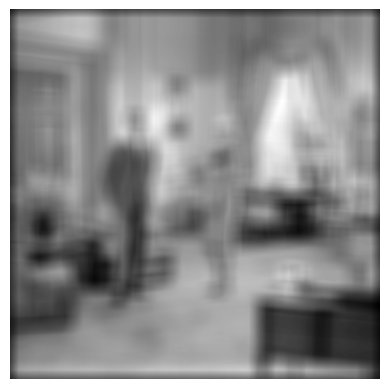

In [ ]:
# convolve the image with the kernel (filter)
convImage = convolve2D(image1, kernel)
print(convImage.shape)

plt.imshow(convImage, cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
# Edge (vertical) Detection

kernel = np.array([[1, 0, -1], [1,0,-1],[1,0,-1]])
print(kernel)
fac = reduce(lambda x, y: x*y, np.shape(kernel))
# print(fac)
kernel = kernel / fac
# print(kernel)


[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


(512, 512)


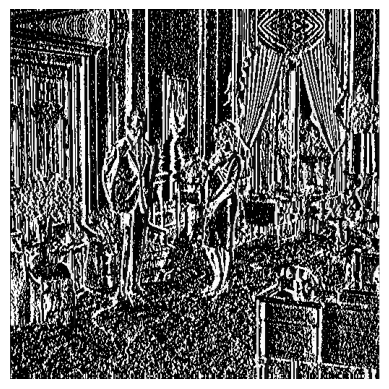

In [ ]:
# convolve the image with the kernel (filter)
convImage = convolve2D(image1, kernel)
print(convImage.shape)

plt.imshow(convImage, cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
# Edge (horizontal) Detection

kernel = np.array([[1, 1, 1], [0,0,0],[-1,-1,-1]])
print(kernel)
fac = reduce(lambda x, y: x*y, np.shape(kernel))
# print(fac)
kernel = kernel / fac
# print(kernel)

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


(512, 512)


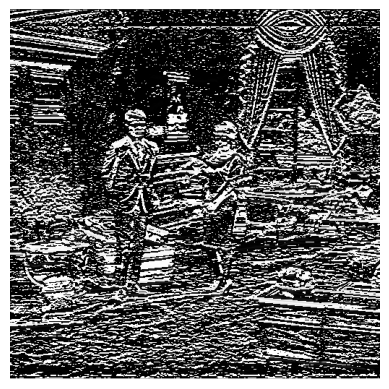

In [ ]:
# convolve the image with the kernel (filter)
convImage = convolve2D(image1, kernel)
print(convImage.shape)

plt.imshow(convImage, cmap = 'gray')
plt.axis('off')
plt.show()

# Pooling Layers

To demonstrate the working of a pooling layer, we shall use [seaborn](https://seaborn.pydata.org), a high level interface to matplotlib.

<Axes: >

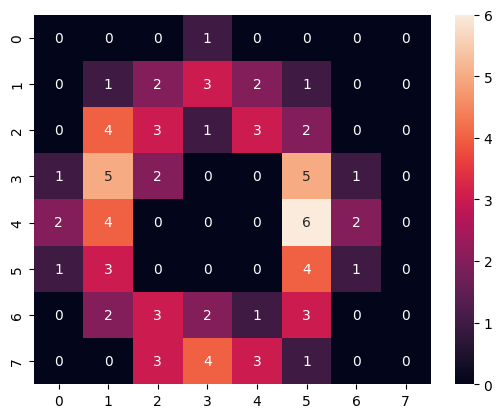

In [ ]:
import seaborn as sns

# building the image of a zero:
zero = np.array([[0,0,0,1,0,0,0,0],
                 [0,1,2,3,2,1,0,0],
                 [0,4,3,1,3,2,0,0],
                 [1,5,2,0,0,5,1,0],
                 [2,4,0,0,0,6,2,0],
                 [1,3,0,0,0,4,1,0],
                 [0,2,3,2,1,3,0,0],
                 [0,0,3,4,3,1,0,0]])
sns.heatmap(zero, annot=True)

In [ ]:
from skimage.util import view_as_blocks
pooling_window_shape = (2,2)
view = view_as_blocks(zero, pooling_window_shape)
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)
mean_view = np.mean(flatten_view, axis=2)
max_view = np.max(flatten_view, axis=2)

<Axes: >

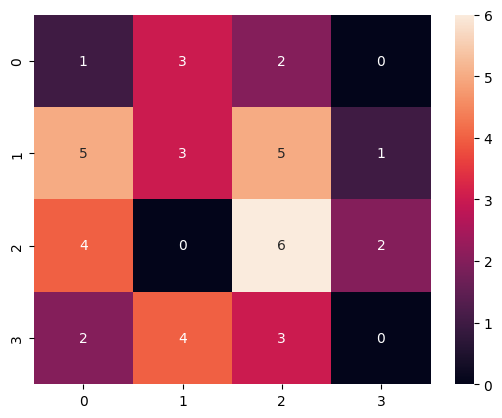

In [ ]:
sns.heatmap(max_view, annot=True)

<Axes: >

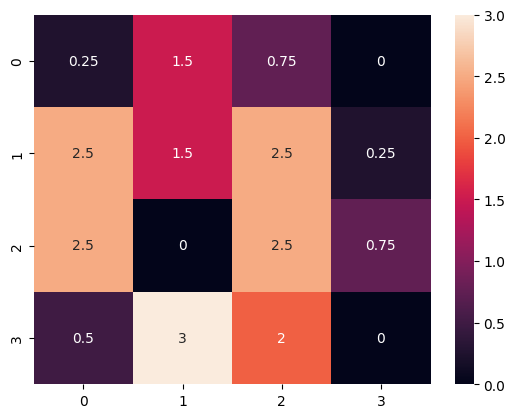

In [ ]:
sns.heatmap(mean_view, annot=True)

## Dense Layers
1. Dense layers are fully connected with the previous layers.
2. The input to the dense layer is 1D. So, in case of images, we shall **flatten** the 2D incomming data to 1D data before getting into the dense layer.

The last layer of our dense sub-network will have a **softmax activation**. Therefore, the activation of the $k$th neuron will be
$$f(z_k) = \frac{e^{z_k}}{\sum_{i=1}^N e^{z_i}} $$
where $N$ is the number of neurons in the output layer.



## Dropout Layers
As we train our convolutional net, due to large number of adjustable parameters, the network can **overfit** the training data. This means that the net will give perfectly good results for the training data, but will loose its ability to recognize new, unseen examples - resulting into loss of generalization.

We can perform **dropout regularization** using dropout layers. Positioning a dropout layer just before the dense layer with one neuron per output variable from the previous layer, each neuron in the dropout layer can act as a gate. It can be turned on or off randonly during the training. When it is on, it will permit the flow of corresponding variable into the dense layer, otherwise it is blocked. Training is carried out in this way and competed.

After the completion of the training phase, the dropout layer is removed and the network is evaluated for the unseen test samples.

# Constructing The Network
We first import the necessary libraries

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

We construct a sequential model beginning with a convolutional layer:

In [ ]:
model = models.Sequential()
model.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )

We have just created a convolutional layer with:
*  kernel size 4x4
*  10 features are needed to be extracted for each kernel
*  the input image size is 28x28 pixels
*  Relu activation function is used

A summary of the network constructed so far can be obtained using:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 10)        170       
                                                                 
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


This shows that the output array has shape of 25x25x10, meaning x and y dimensional are 25 = 28 - 4 + 1 = 25, and that it will give 10 features.

Now we add a fully connected dense layer to our model. As a starting point, we use a single dense layer (a single hidden layer) with 100 neurons. We shall experiment with this later in this notebook. As we are dealing with images, the convolved images along with 10 features each (resulting into a 3D array) coming out of the convolution layer need to be flattened (into a 1D array). Therefore,we add:

In [ ]:
model.add( layers.Flatten() )
model.add( layers.Dense(100, activation='relu') )

At the output layer, we add a softmax layer with 10 neurons (corresponding to 10 digit categories):

In [ ]:
model.add( layers.Dense(10, activation='softmax') )

Here is the model summary:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 10)        170       
                                                                 
 flatten (Flatten)           (None, 6250)              0         
                                                                 
 dense (Dense)               (None, 100)               625100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 626,280
Trainable params: 626,280
Non-trainable params: 0
_________________________________________________________________


The total number of parameters to be optimized is more than 600K. We next compile our model (specifying the loss function, with the optimizer and the metric used):

In [ ]:
from keras.optimizers import RMSprop

RMSprop

(1) maintains moving average of the square of the gradients and (2) divides the current gradient with the root of this average.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


We are now ready to train this simple model.